In [1]:
# All imports should be in first cell
import cartopy
import importlib
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import ThinWalls
import GMesh

In [2]:
importlib.reload(ThinWalls);

In [3]:
# Colormap for plots
cmap = plt.cm.seismic
norm = matplotlib.colors.BoundaryNorm(np.linspace(0,4,17),cmap.N)

# 3x2 target grid with 6x4 topographic data containing a diagonal wall

Set cell means of fine (6x4 mesh) to source topography

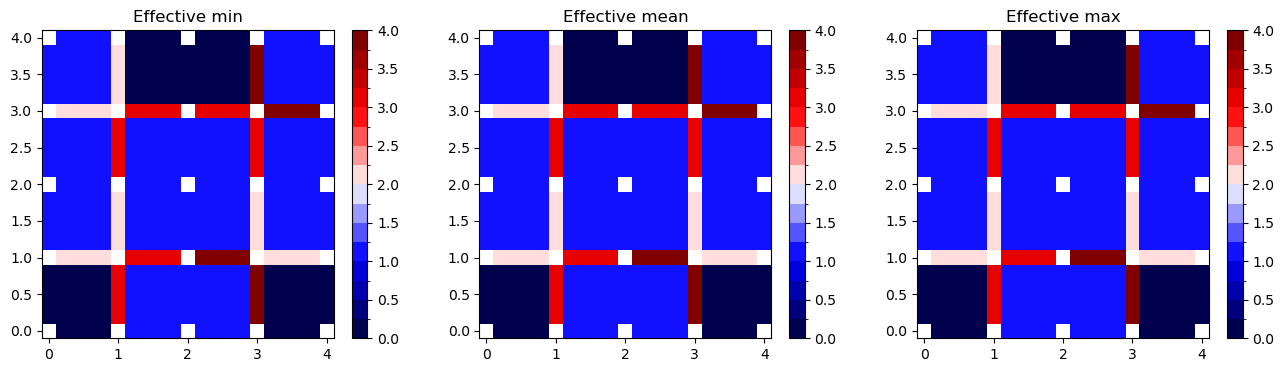

In [4]:
ni,nj = 4,4
FG = ThinWalls.ThinWalls(lon=np.linspace(0,ni,ni+1), lat=np.linspace(0,nj,nj+1))
FG.set_cell_mean(
    np.array(
[
    [0,1,1,0],
    [1,1,1,1],
    [1,1,1,1],
    [1,0,0,1]
]))
FG.set_edge_mean(
    np.array(
[
    [0,3,1,4,0],
    [1,2,1,2,1],
    [1,3,1,3,1],
    [1,2,0,4,1]
]),
    np.array(
[
    [0,1,1,0],
    [2,3,4,2],
    [1,1,1,1],
    [2,3,3,4],
    [1,0,0,1]
])
)

FG.init_effective_values()

plt.figure(figsize=(16,4))
ax = plt.subplot(131); plt.colorbar(
    FG.plot(ax, norm=norm, cmap=cmap, measure='effective', metric='min'), ax=ax); plt.title('Effective min');
ax = plt.subplot(132); plt.colorbar(
    FG.plot(ax, norm=norm, cmap=cmap, measure='effective'), ax=ax); plt.title('Effective mean');
ax = plt.subplot(133); plt.colorbar(
    FG.plot(ax, norm=norm, cmap=cmap, measure='effective', metric='max'), ax=ax); plt.title('Effective max');

Snap internal ridges to a best concave arrangement of outer edges

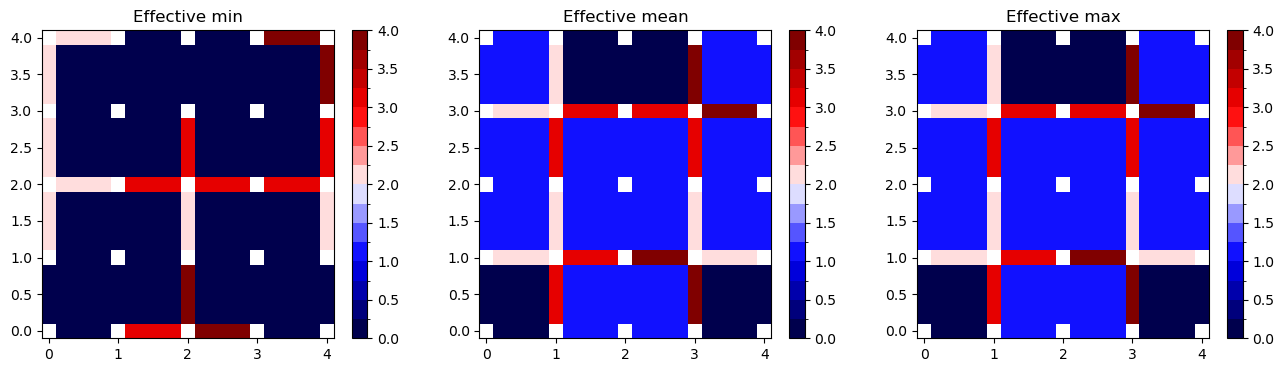

In [5]:
# FG.lower_tallest_buttress()
# FG.push_corners()
# FG.fold_out_central_ridges()
FG.invert_exterior_corners()

plt.figure(figsize=(16,4))
ax = plt.subplot(131); plt.colorbar(
    FG.plot(ax, norm=norm, cmap=cmap, measure='effective', metric='min'), ax=ax); plt.title('Effective min');
ax = plt.subplot(132); plt.colorbar(
    FG.plot(ax, norm=norm, cmap=cmap, measure='effective'), ax=ax); plt.title('Effective mean');
ax = plt.subplot(133); plt.colorbar(
    FG.plot(ax, norm=norm, cmap=cmap, measure='effective', metric='max'), ax=ax); plt.title('Effective max');